In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

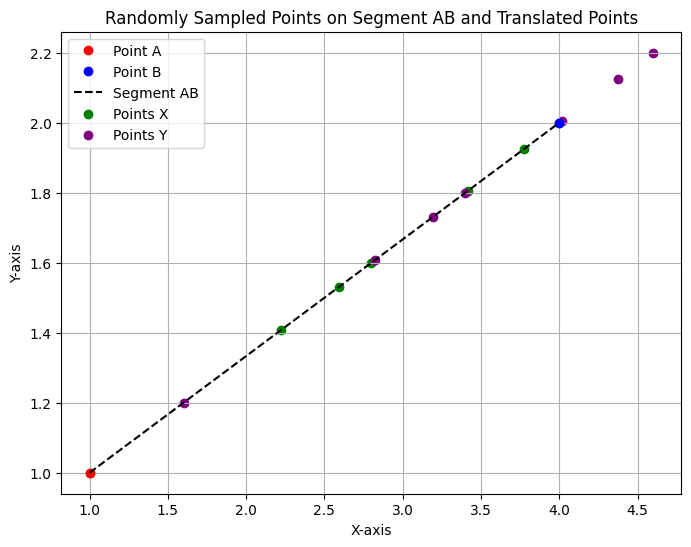

In [2]:
def sample_random_points(A, B, n):
    # Randomly sample n points between A and B
    t = np.random.uniform(0, 1, n)  # Random values between 0 and 1
    t = np.insert(t, 0, 0)  # Add 0 at the beginning of t
    t = np.append(t, 1)     # Add 1 at the end of t
    X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
    
    # Compute the constant c such that A + nc = B
    c = (B - A) / n
    
    # Generate Y points
    Y = X + c
    
    return X, Y

def plot_points(A, B, X, Y):
    plt.figure(figsize=(8, 6))
    
    # Plot points A and B
    plt.plot(*A, 'ro', label='Point A')
    plt.plot(*B, 'bo', label='Point B')
    
    # Plot the segment between A and B
    plt.plot([A[0], B[0]], [A[1], B[1]], 'k--', label='Segment AB')
    
    # Plot points X and Y
    plt.scatter(X[:, 0], X[:, 1], c='green', label='Points X')
    plt.scatter(Y[:, 0], Y[:, 1], c='purple', label='Points Y')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.title('Randomly Sampled Points on Segment AB and Translated Points')
    plt.show()

# Example usage
A = np.array([1.0, 1.0])  # Point A
B = np.array([4.0, 2.0])  # Point B
n = 5                      # Number of points to sample

X, Y = sample_random_points(A, B, n)
plot_points(A, B, X, Y)

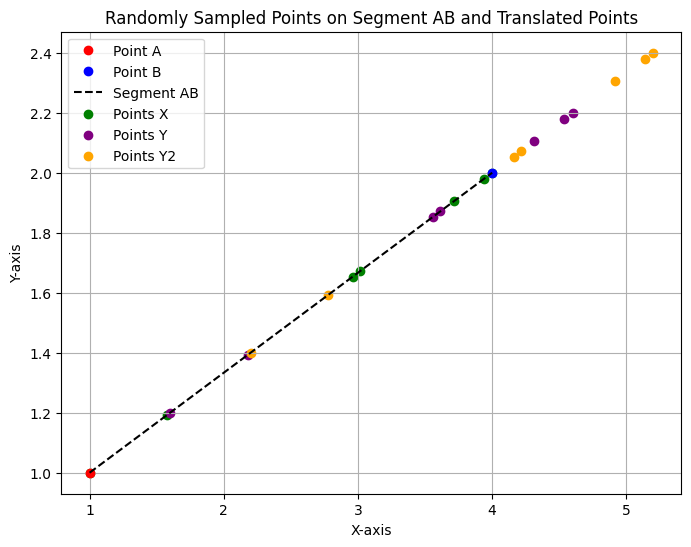

In [3]:
def sample_random_points_2(A, B, n):
    # Randomly sample n points between A and B
    t = np.random.uniform(0, 1, n)  # Random values between 0 and 1
    t = np.insert(t, 0, 0)  # Add 0 at the beginning of t
    t = np.append(t, 1)     # Add 1 at the end of t
    X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
    
    # Compute the constant c such that A + nc = B
    c = (B - A) / n
    
    # Generate Y points
    Y = X + c
    Y_2 = Y + c
    return X, Y, Y_2

def plot_points(A, B, X, Y, Y2):
    plt.figure(figsize=(8, 6))
    
    # Plot points A and B
    plt.plot(*A, 'ro', label='Point A')
    plt.plot(*B, 'bo', label='Point B')
    
    # Plot the segment between A and B
    plt.plot([A[0], B[0]], [A[1], B[1]], 'k--', label='Segment AB')
    
    # Plot points X and Y
    plt.scatter(X[:, 0], X[:, 1], c='green', label='Points X')
    plt.scatter(Y[:, 0], Y[:, 1], c='purple', label='Points Y')
    plt.scatter(Y2[:, 0], Y2[:, 1], c='orange', label='Points Y2')
    
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.title('Randomly Sampled Points on Segment AB and Translated Points')
    plt.show()
    
A = np.array([1.0, 1.0])  # Point A
B = np.array([4.0, 2.0])  # Point B
n = 5                      # Number of points to sample

X, Y, Y2 = sample_random_points_2(A, B, n)
plot_points(A, B, X, Y, Y2)

In [4]:
# Function to sample random points and generate corresponding Y
def sample_random_points(A, B, n):
    t = np.random.uniform(0, 1, n)  # Random values between 0 and 1
    t = np.insert(t, 0, 0)  # Add 0 at the beginning of t
    t = np.append(t, 1)     # Add 1 at the end of t
    X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
    c = (B - A) / n
    Y = X + c
    return X, Y

# Define the neural network model
class SimpleNN(nn.Module):
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, input_dim)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

# Create the neural network model
def create_model(input_dim, device):
    model = SimpleNN(input_dim).to(device)
    return model

# Train the model
def train_model(model, X_train, Y_train, device, epochs=1000, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train = torch.tensor(Y_train, dtype=torch.float32).to(device)
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

In [5]:
# Example usage
A = np.array([1.0, 1.0])  # Point A
B = np.array([4.0, 2.0])  # Point B
n = 50                   # Number of points to sample

X, Y = sample_random_points(A, B, n)

# Determine if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = create_model(input_dim=X.shape[1], device=device)
train_model(model, X, Y, device)


Epoch [100/1000], Loss: 0.0485
Epoch [200/1000], Loss: 0.0130
Epoch [300/1000], Loss: 0.0091
Epoch [400/1000], Loss: 0.0061
Epoch [500/1000], Loss: 0.0038
Epoch [600/1000], Loss: 0.0023
Epoch [700/1000], Loss: 0.0013
Epoch [800/1000], Loss: 0.0007
Epoch [900/1000], Loss: 0.0003
Epoch [1000/1000], Loss: 0.0002


In [89]:
# Make predictions and plot results
model.eval()
Y_pred_mlp = [A[None,...]]
with torch.no_grad():
    for i in range(n):
        Y_pred_mlp.append(model(torch.tensor(Y_pred_mlp[-1], dtype=torch.float32).to(device)).cpu().numpy())
Y_pred_mlp = np.array(Y_pred_mlp).squeeze()

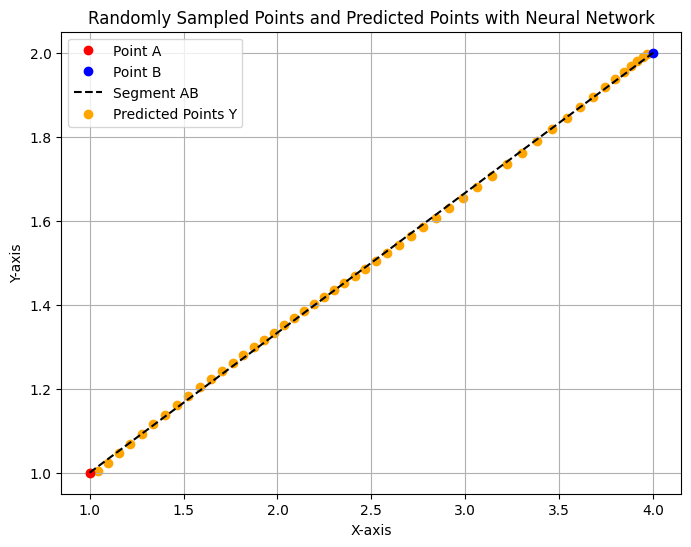

In [90]:
plt.figure(figsize=(8, 6))
plt.plot(*A, 'ro', label='Point A')
plt.plot(*B, 'bo', label='Point B')
plt.plot([A[0], B[0]], [A[1], B[1]], 'k--', label='Segment AB')
#plt.scatter(X[:, 0], X[:, 1], c='green', label='Points X')
#plt.scatter(Y[:, 0], Y[:, 1], c='purple', label='Points Y')
plt.scatter(Y_pred_mlp[:, 0], Y_pred_mlp[:, 1], c='orange', label='Predicted Points Y')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.title('Randomly Sampled Points and Predicted Points with Neural Network')
plt.show()

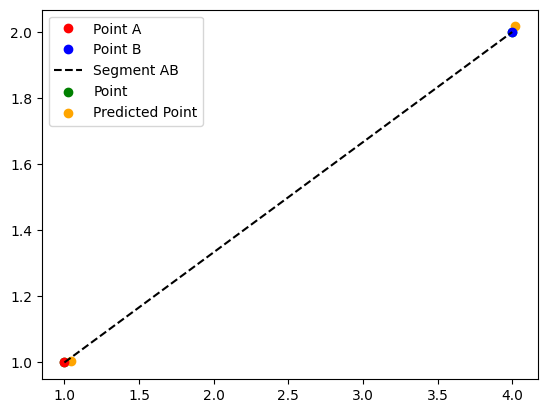

In [91]:
plt.plot(*A, 'ro', label='Point A')
plt.plot(*B, 'bo', label='Point B')
plt.plot([A[0], B[0]], [A[1], B[1]], 'k--', label='Segment AB')
x = torch.tensor(np.linspace(A, B, 2), dtype=torch.float32).to(device)
y = model(x).cpu().detach().numpy()
x = x.cpu().detach().numpy()
plt.scatter(x[:, 0], x[:, 1], c='green', label='Point')
plt.scatter(y[:, 0], y[:, 1], c='orange', label='Predicted Point')
plt.legend()

In [6]:
class EBM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(EBM, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.act1 = nn.SiLU()
        self.fc2 = nn.Linear(hidden_size,hidden_size)
        self.act2 = nn.SiLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.act3 = nn.SiLU()
        self.fc4 = nn.Linear(hidden_size, output_size)
        
    def forward(self, act, obs):
        x = torch.cat((act.float(), obs.float()), dim=-1)
        x = self.act1(self.fc1(x))
        x = self.act2(self.fc2(x))
        x = self.act3(self.fc3(x))
        x = self.fc4(x)
        return x

In [93]:
from methods import langvin_sample, energy_discrepancy, DFO

def train_ebm(X, Y, t_noise=0.25, num_epochs=100, batch_size=32, hidden_size=512):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = EBM(X.shape[-1]+Y.shape[-1], hidden_size, 1).to(device)
    optimizer = optim.Adam(model.parameters())
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            loss, _, _  = energy_discrepancy(model, target, input, t_noise=t_noise, m_particles=128, w_stable=3.0)
            #loss = DFO(model, target, input, num_samples=200)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if (epoch + 1) % 2 == 0:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    return model

ebm = train_ebm(X, Y)

Epoch [2/100], Loss: 4.8620
Epoch [4/100], Loss: 4.9300
Epoch [6/100], Loss: 4.8288
Epoch [8/100], Loss: 4.7990
Epoch [10/100], Loss: 4.6631
Epoch [12/100], Loss: 4.2524
Epoch [14/100], Loss: 4.1533
Epoch [16/100], Loss: 3.3602
Epoch [18/100], Loss: 3.4866
Epoch [20/100], Loss: 3.2088
Epoch [22/100], Loss: 3.0075
Epoch [24/100], Loss: 2.9760
Epoch [26/100], Loss: 2.5265
Epoch [28/100], Loss: 2.5489
Epoch [30/100], Loss: 2.5084
Epoch [32/100], Loss: 2.2896
Epoch [34/100], Loss: 2.1682
Epoch [36/100], Loss: 1.9888
Epoch [38/100], Loss: 2.1815
Epoch [40/100], Loss: 2.0407
Epoch [42/100], Loss: 1.9747
Epoch [44/100], Loss: 1.7806
Epoch [46/100], Loss: 1.7349
Epoch [48/100], Loss: 1.6739
Epoch [50/100], Loss: 1.7081
Epoch [52/100], Loss: 1.7363
Epoch [54/100], Loss: 1.7610
Epoch [56/100], Loss: 1.5527
Epoch [58/100], Loss: 1.6007
Epoch [60/100], Loss: 1.6174
Epoch [62/100], Loss: 1.6532
Epoch [64/100], Loss: 1.5781
Epoch [66/100], Loss: 1.6305
Epoch [68/100], Loss: 1.5456
Epoch [70/100], Lo

In [31]:
x = torch.ones(1, 2).to(device)
y = torch.ones(1, 2).to(device)
ebm.eval()
with torch.no_grad():
    print(ebm(x, y))

tensor([[0.5462]], device='cuda:0')


In [94]:
def plot_energy(point):
    x, y = torch.linspace(1., 5., 500), torch.linspace(1., 5., 500)
    X_mesh, Y_mesh = torch.meshgrid(x, y)
    temp = torch.from_numpy(np.tile(point[None,None,...], (500, 500, 1))).float()
    X_mesh = X_mesh[...,None]
    Y_mesh = Y_mesh[...,None]
    p = torch.cat((X_mesh.to(device), Y_mesh.to(device)), dim=-1)
    Z_mesh = ebm(p, temp.to(device)).cpu().detach().numpy()
    i, j, _ = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)
    plt.figure()
    plt.contourf(X_mesh.squeeze(), Y_mesh.squeeze(), Z_mesh.squeeze(), levels=20, cmap='viridis')
    plt.scatter(point[0], point[1], color= 'red', label='Start')
    plt.scatter(x[i], y[j], color= 'green', label='End')
    plt.colorbar(label='Energy')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Energy Landscape')
    plt.grid(True)
    plt.show()

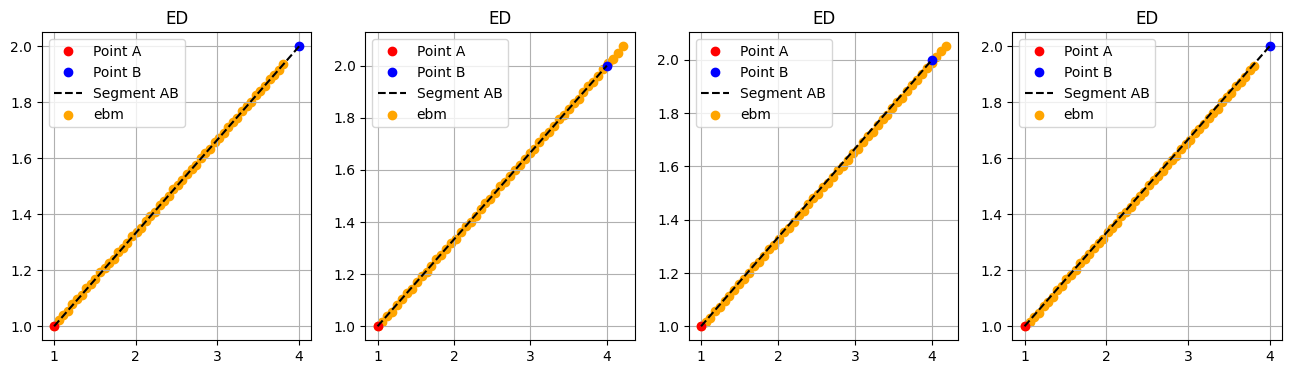

In [96]:
from methods import langvin_sample, energy_discrepancy, DFO
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

def train_ebm(X, Y, t_noise=0.25, num_epochs=2000, batch_size=32, hidden_size=512):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = EBM(X.shape[-1]+Y.shape[-1], hidden_size, 1).to(device)
    optimizer = optim.Adam(model.parameters())
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            #loss = DFO(model, target, input, num_samples=1000)
            loss, _, _  = energy_discrepancy(model, target, input, t_noise=t_noise, m_particles=256, w_stable=0.5)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        #if (epoch + 1) % 2 == 0:
        #    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')
    
    return model

fig, ax = plt.subplots(1, 4, figsize=(16, 4))
for k in range(4):
    ebm = train_ebm(X, Y)
    ebm.eval()
    Y_pred = [A]
    for i in range(n):
        temp = torch.from_numpy(np.tile(Y_pred[-1][None, None, ...], (500, 500, 1))).float()
        x, y = torch.linspace(1., 5., 500), torch.linspace(1., 5., 500)
        X_mesh, Y_mesh = torch.meshgrid(x, y)
        X_mesh = X_mesh[...,None]
        Y_mesh = Y_mesh[...,None]
        p = torch.cat((X_mesh.to(device), Y_mesh.to(device)), dim=-1)
        Z_mesh = ebm(p, temp.to(device)).cpu().detach().numpy()
        i, j, _ = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)
        Y_pred.append(np.array([x[i], y[j]]))
        #Y_pred.append(langvin_sample(ebm, torch.from_numpy(Y_pred[-1]).to(device), torch.from_numpy(Y_pred[-1]).to(device)).cpu().detach().numpy())
    Y_pred = np.array(Y_pred)

    
    ax[k].plot(*A, 'ro', label='Point A')
    ax[k].plot(*B, 'bo', label='Point B')
    ax[k].plot([A[0], B[0]], [A[1], B[1]], 'k--', label='Segment AB')
    #plt.scatter(X[:, 0], X[:, 1], c='green', label='Points X')
    #plt.scatter(Y[:, 0], Y[:, 1], c='purple', label='Points Y')
    Y_truth = np.linspace(A, B, n+1)[1:-1]
    #plt.scatter(Y_truth[:, 0], Y_truth[:, 1], c='purple', label='Real Points Y')
    ax[k].scatter(Y_pred[:, 0], Y_pred[:, 1], c='orange', label='ebm')
    #plt.scatter(Y_pred_mlp[:, 0], Y_pred_mlp[:, 1], c='green', label='mlp')
    ax[k].legend()
    ax[k].grid(True)
    ax[k].set_title('ED')


Epoch [100/1000], Loss: 0.0090
Epoch [200/1000], Loss: 0.0030
Epoch [300/1000], Loss: 0.0010
Epoch [400/1000], Loss: 0.0003
Epoch [500/1000], Loss: 0.0002
Epoch [600/1000], Loss: 0.0001
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001


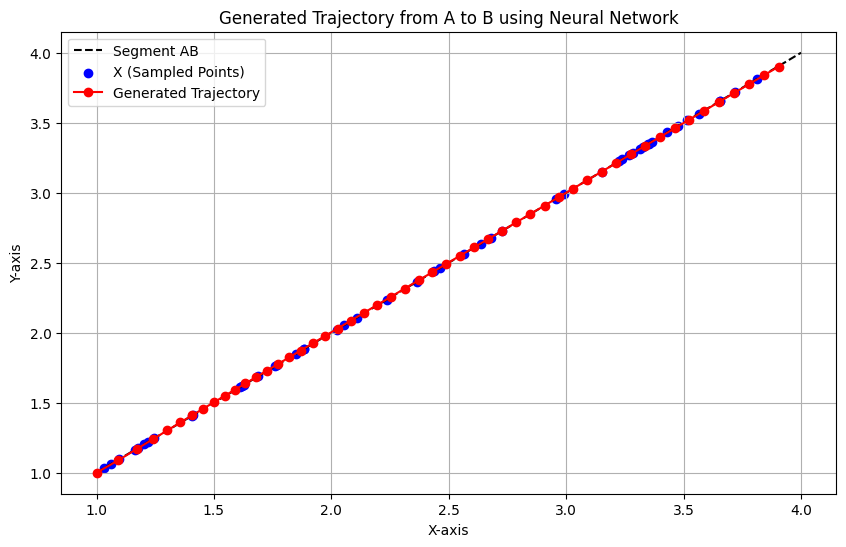

In [56]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Function to sample random points and generate corresponding Y
def sample_data(A, B, n):
    t = np.random.uniform(0, 1, n)  # Random values between 0 and 1
    X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
    c = (B - A) / n
    Y = X + c
    Y_next = Y + c
    return X, Y, Y_next

# Define the neural network model
class PredictNextY(nn.Module):
    def __init__(self):
        super(PredictNextY, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 4)  # Four output neurons: two for y_i and two for y_{i+1}
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x.view(-1, 2, 2)  # Reshape to have two 2D outputs (y_i and y_{i+1})

# Train the model
def train_model(model, X_train, Y_train, device, epochs=1000, lr=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    X_train = torch.tensor(X_train, dtype=torch.float32).to(device)
    Y_train = torch.tensor(Y_train, dtype=torch.float32).to(device)
    
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, Y_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

# Generate trajectory step by step
def generate_trajectory(model, A, B, n_steps, device):
    trajectory = [A]  # Start with point A
    current_point = torch.tensor(A, dtype=torch.float32).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        for _ in range(n_steps):
            # Predict the next two points
            prediction = model(current_point).cpu().numpy()
            next_point = prediction[0, 0]  # Take the first predicted point
            
            trajectory.append(next_point)  # Add the first point to the trajectory
            
            current_point = torch.tensor(next_point, dtype=torch.float32).unsqueeze(0).to(device)  # Update current point
    
    return np.array(trajectory)

# Example usage
A = np.array([1.0, 1.0])  # Point A in 2D
B = np.array([4.0, 4.0])  # Point B in 2D
n = 50  # Number of points to sample

X, Y, Y_next = sample_data(A, B, n)

# Prepare training data
Y_train = np.stack((Y, Y_next), axis=1)  # Stack y_i and y_{i+1} as two 2D outputs

# Determine if CUDA is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = PredictNextY().to(device)
train_model(model, X, Y_train, device)

# Generate trajectory
n_steps = n  # Number of steps in the trajectory
trajectory = generate_trajectory(model, A, B, n_steps, device)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot original segment and predicted trajectory
plt.plot([A[0], B[0]], [A[1], B[1]], 'k--', label='Segment AB')
plt.scatter(X[:, 0], X[:, 1], c='blue', label='X (Sampled Points)')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'r-o', label='Generated Trajectory')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.title('Generated Trajectory from A to B using Neural Network')
plt.show()


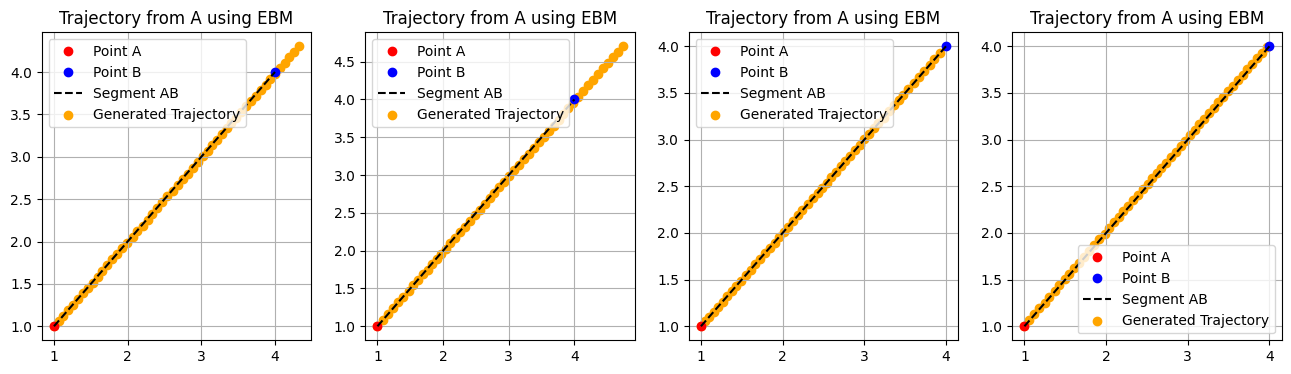

In [58]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from methods import langvin_sample, energy_discrepancy
import os

# Set CUDA launch blocking to avoid race conditions
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the function to train the EBM model
def train_ebm(X, Y, t_noise=0.25, num_epochs=2000, batch_size=32, hidden_size=512):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = EBM(X.shape[-1]+Y.shape[-1], hidden_size, 1).to(device)
    optimizer = optim.Adam(model.parameters())
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            loss, _, _  = energy_discrepancy(model, target, input, t_noise=t_noise, m_particles=256, w_stable=1.0)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    return model

# Function to generate the trajectory step by step
def generate_trajectory_ebm(model, A, n_steps):
    trajectory = [A]  # Start with point A
    current_point = torch.tensor(A, dtype=torch.float32).unsqueeze(0).to(device)
    last_point = torch.tensor(A, dtype=torch.float32).unsqueeze(0).to(device)
    model.eval()
    for _ in range(n_steps):
        # Predict the next two points using the current point
        next_points = langvin_sample(model, torch.cat([last_point, current_point], dim=1), current_point).cpu().detach().numpy()
        
        # Add only the first predicted point to the trajectory
        first_predicted_point = next_points[0][:2]  # Get the first point in the prediction
        trajectory.append(first_predicted_point)
        
        # Update the current point for the next prediction
        last_point = current_point
        current_point = torch.tensor(first_predicted_point, dtype=torch.float32).unsqueeze(0).to(device)

    return np.array(trajectory)

# Example usage
A = np.array([1.0, 1.0])  # Starting point A
B = np.array([4.0, 4.0])  # Ending point B

# Assume X and Y are already generated or loaded
# X, Y = ...
Y_train = np.concatenate([Y, Y_next], axis=1)
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for k in range(4):
    # Train the EBM model
    ebm = train_ebm(X, Y_train, t_noise=0.25)
    
    # Generate the trajectory using the trained EBM model
    trajectory = generate_trajectory_ebm(ebm, A, n)
    
    # Plot the trajectory and other relevant points
    ax[k].plot(*A, 'ro', label='Point A')
    ax[k].plot(*B, 'bo', label='Point B')
    ax[k].plot([A[0], B[0]], [A[1], B[1]], 'k--', label='Segment AB')
    ax[k].scatter(trajectory[:, 0], trajectory[:, 1], c='orange', label='Generated Trajectory')
    ax[k].legend()
    ax[k].grid(True)
    ax[k].set_title('Trajectory from A using EBM')

plt.show()

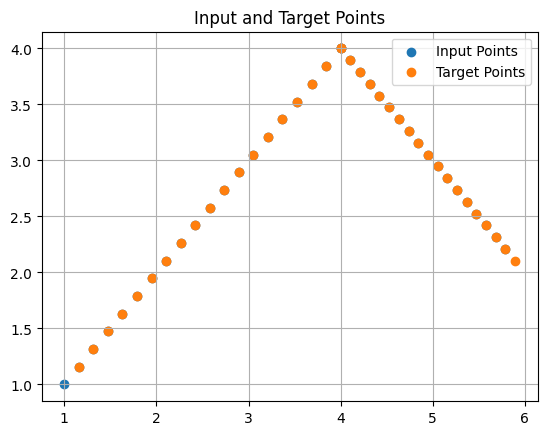

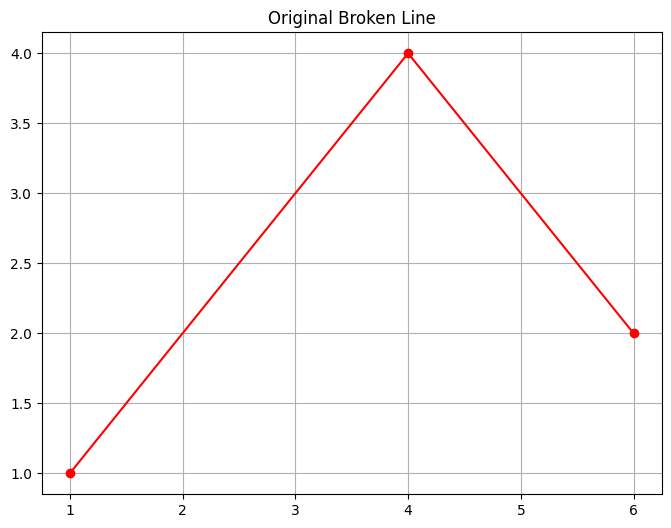

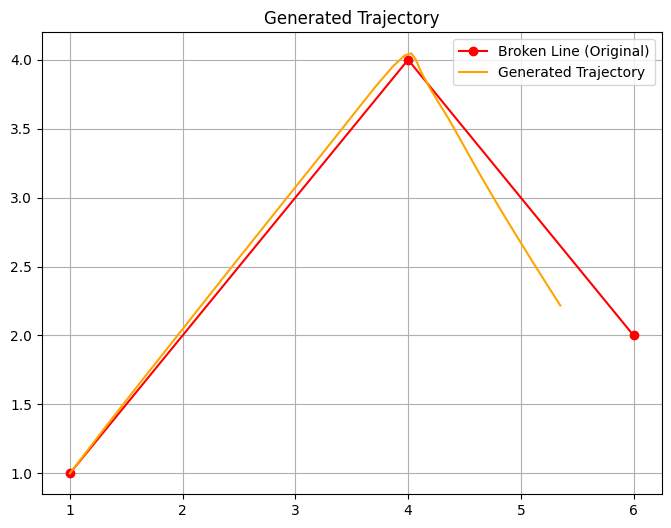

In [42]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import os

# Set CUDA launch blocking to avoid race conditions
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the neural network model
class TrajectoryPredictor(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, output_size=4):  # Output size is doubled for predicting two points
        super(TrajectoryPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

# Define the function to train the neural network model
def train_nn(X, Y, num_epochs=2000, batch_size=32, hidden_size=128):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = TrajectoryPredictor(input_size=X.shape[-1], hidden_size=hidden_size, output_size=Y.shape[-1]).to(device)
    optimizer = optim.Adam(model.parameters())
    criterion = nn.MSELoss()
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            output = model(input)
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    return model

# Function to prepare the data for the entire trajectory
def prepare_trajectory_data(points, n_per_segment):
    X, Y = [], []
    for i in range(len(points) - 1):
        A = points[i]
        B = points[i + 1]
        t = np.linspace(0, 1, n_per_segment)
        segment_X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
        c = (B - A) / n_per_segment
        segment_Y = segment_X + c
        X.append(segment_X)
        Y.append(segment_Y)
    
    # Stack all segments and create inputs and targets
    X = np.vstack(X)
    Y = np.vstack(Y)
    
    # Create inputs and targets for prediction
    inputs = X[:-2]  # All but last two points
    targets = np.hstack([X[1:-1], X[2:]])  # Next two points
    
    return inputs, targets

# Function to generate the trajectory using the trained neural network
def generate_trajectory_nn(model, start_point, n_steps):
    trajectory = [start_point]
    current_point = torch.tensor(start_point, dtype=torch.float32).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        for _ in range(n_steps):
            # Predict the next two points using the current point
            next_points = model(current_point).cpu().detach().numpy().reshape(-1, 2)
            
            # Add only the first predicted point to the trajectory
            first_predicted_point = next_points[0]  # Get the first point in the prediction
            trajectory.append(first_predicted_point)
            
            # Update the current point for the next prediction
            current_point = torch.tensor(first_predicted_point, dtype=torch.float32).unsqueeze(0).to(device)
    
    return np.array(trajectory)

# Example usage
# Define the points that create the broken line
points = [np.array([1.0, 1.0]), np.array([4.0, 4.0]), np.array([6.0, 2.0])]
n_per_segment = 20  # Number of steps per segment

# Prepare the trajectory data
X, Y = prepare_trajectory_data(points, n_per_segment)
plt.scatter(X[:, 0], X[:, 1], label='Input Points')
plt.scatter(Y[:, 0], Y[:, 1], label='Target Points')
plt.legend()
plt.grid(True)
plt.title('Input and Target Points')
plt.show()
# Train the neural network model on the entire trajectory
model = train_nn(X, Y)

# Generate the trajectory from the starting point
start_point = points[0]
trajectory = generate_trajectory_nn(model, start_point, len(X))

# Plot the original broken line
plt.figure(figsize=(8, 6))
plt.plot(*zip(*points), 'ro-', label='Broken Line (Original)')
plt.grid(True)
plt.title('Original Broken Line')
plt.show()

# Plot the generated trajectory
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(*zip(*points), 'ro-', label='Broken Line (Original)')
ax.plot(trajectory[:, 0], trajectory[:, 1], 'orange', label='Generated Trajectory')
ax.legend()
ax.grid(True)
ax.set_title('Generated Trajectory')
plt.show()


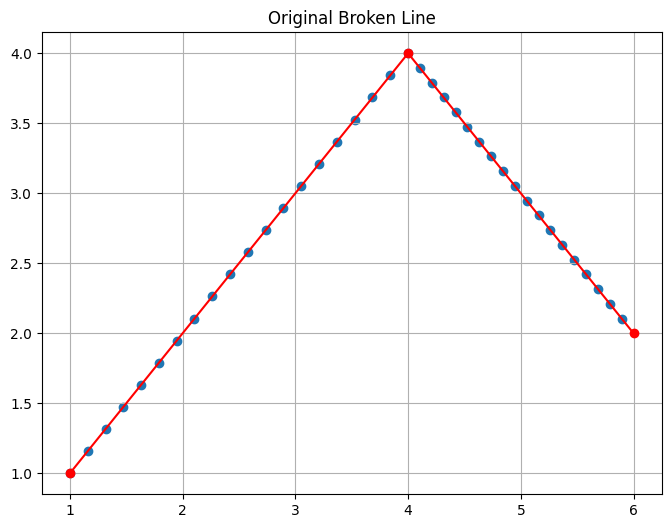

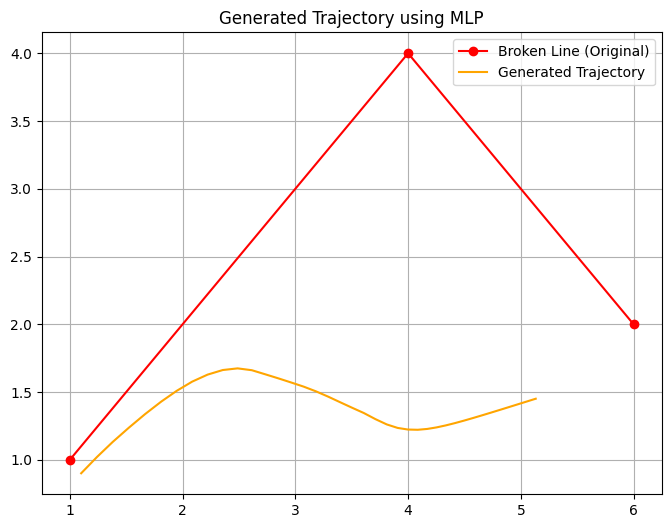

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
import os

# Set CUDA launch blocking to avoid race conditions
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the MLP model
class TrajectoryMLP(nn.Module):
    def __init__(self, input_size=2, hidden_size=128, output_size=2):  # Output size is for the next point
        super(TrajectoryMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

# Function to train the MLP
def train_mlp(X, Y, num_epochs=1000, batch_size=32, hidden_size=128):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = TrajectoryMLP(input_size=X.shape[-1], hidden_size=hidden_size, output_size=Y.shape[-1]).to(device)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            output = model(input)
            loss = criterion(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    return model

# Function to generate the trajectory step by step using the trained MLP
def generate_trajectory_mlp(model, start_point, n_steps):
    trajectory = [start_point]
    current_point = torch.tensor(start_point, dtype=torch.float32).unsqueeze(0).to(device)
    
    model.eval()
    with torch.no_grad():
        for _ in range(n_steps):
            next_point = model(current_point).cpu().detach().numpy()
            trajectory.append(next_point[0])
            current_point = torch.tensor(next_point, dtype=torch.float32).to(device)
    
    return np.array(trajectory)

# Example usage
# Define the points that create the broken line
points = [np.array([1.0, 1.0]), np.array([4.0, 4.0]), np.array([6.0, 2.0])]
n_per_segment = 20  # Number of steps per segment

# Create the broken line data
def create_broken_line(points, n_per_segment):
    X, Y = [], []
    for i in range(len(points) - 1):
        A = points[i]
        B = points[i + 1]
        t = np.linspace(0, 1, n_per_segment)
        segment_X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
        c = (B - A) / n_per_segment
        segment_Y = segment_X + c
        X.append(segment_X[:-1])
        Y.append(segment_X[1:])
    return np.vstack(X), np.vstack(Y)

X, Y = create_broken_line(points, n_per_segment)
# Plot the original broken line
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label='Input')
plt.plot(*zip(*points), 'ro-', label='Broken Line (Original)')
plt.grid(True)
plt.title('Original Broken Line')
plt.show()

# Train the MLP on the entire trajectory
mlp_model = train_mlp(X, Y)

# Generate the trajectory from the starting point using the trained MLP
start_point = points[0]+np.array([0.1,-0.1])
trajectory = generate_trajectory_mlp(mlp_model, start_point, len(X))

# Plot the generated trajectory
plt.figure(figsize=(8, 6))
plt.plot(*zip(*points), 'ro-', label='Broken Line (Original)')
plt.plot(trajectory[:, 0], trajectory[:, 1], 'orange', label='Generated Trajectory')
plt.legend()
plt.grid(True)
plt.title('Generated Trajectory using MLP')
plt.show()

In [71]:
len(X)

38

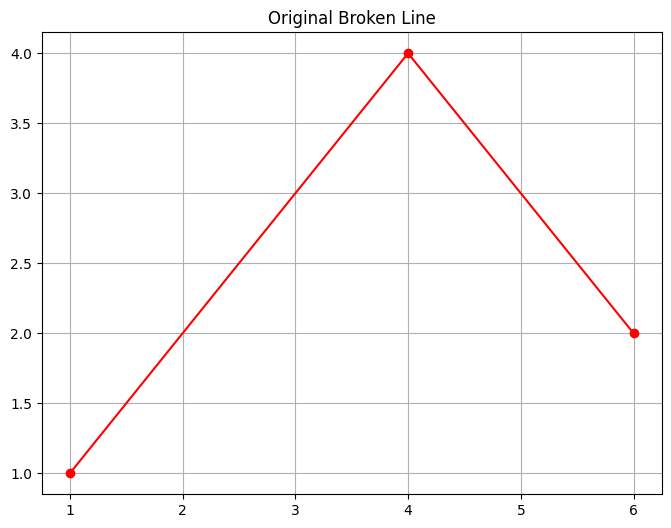

/root/miniconda3/envs/ebm/lib/python3.8/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from methods import langvin_sample, energy_discrepancy
import os

# Set CUDA launch blocking to avoid race conditions
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the function to train the EBM model
def train_ebm(X, Y, t_noise=0.25, num_epochs=2000, batch_size=32, hidden_size=512):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = EBM(X.shape[-1]+Y.shape[-1], hidden_size, 1).to(device)
    optimizer = optim.Adam(model.parameters())
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            loss, _, _  = energy_discrepancy(model, target, input, t_noise=t_noise, m_particles=256, w_stable=0.5)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    return model

# Function to generate the trajectory step by step
def generate_trajectory_ebm(model, A, n_steps):
    trajectory = [A]  # Start with point A
    current_point = torch.tensor(A, dtype=torch.float32).to(device)
    
    model.eval()
    for _ in range(n_steps):
        # Predict the next two points using the current point
        #temp = torch.from_numpy(np.tile(current_point[None, None, ...], (500, 500, 1))).float()
        temp = current_point[None, None, ...].repeat([1000, 1000, 1])
        x, y = torch.linspace(0., 10., 1000), torch.linspace(0., 6., 1000)
        X_mesh, Y_mesh = torch.meshgrid(x, y)
        X_mesh = X_mesh[...,None]
        Y_mesh = Y_mesh[...,None]
        p = torch.cat((X_mesh.to(device), Y_mesh.to(device)), dim=-1)
        Z_mesh = ebm(p, temp.to(device)).cpu().detach().numpy()
        i, j, _ = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)
        trajectory.append(np.array([x[i], y[j]]))
        '''next_points = langvin_sample(model, current_point, current_point, noise_scale=0).cpu().detach().numpy()
        
        # Add only the first predicted point to the trajectory
        first_predicted_point = next_points[0]  # Get the first point in the prediction
        trajectory.append(first_predicted_point)'''
        
        # Update the current point for the next prediction
        current_point = torch.tensor([x[i], y[j]], dtype=torch.float32).to(device)
    
    return np.array(trajectory)

# Function to create a broken line (piecewise linear path)
def create_broken_line(points, n_per_segment):
    X, Y = [], []
    for i in range(len(points) - 1):
        A = points[i]
        B = points[i + 1]
        t = np.random.uniform(0, 1, n_per_segment)
        segment_X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
        c = (B - A) / n_per_segment
        segment_Y = segment_X + c
        X.append(segment_X)
        Y.append(segment_Y)
    return np.vstack(X), np.vstack(Y)

# Example usage
# Define the points that create the broken line
points = [np.array([1.0, 1.0]), np.array([4.0, 4.0]), np.array([6.0, 2.0])]
n_per_segment = 20  # Number of steps per segment

# Create the broken line data
X, Y = create_broken_line(points, n_per_segment)

# Plot the original broken line
plt.figure(figsize=(8, 6))
plt.plot(*zip(*points), 'ro-', label='Broken Line (Original)')
plt.grid(True)
plt.title('Original Broken Line')
plt.show()

# Now generate the trajectory using the EBM model for each segment
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    ebm = train_ebm(X, Y)    
    trajectory = generate_trajectory_ebm(ebm, points[0]+np.array([-0.1, 0.1]), len(X))
    ax[i].plot(*zip(*points), 'ro-', label='Broken Line (Original)')
    # Plot the trajectory
    ax[i].plot(trajectory[:, 0], trajectory[:, 1], c='orange', label='Generated Trajectory')
    ax[i].legend()
    ax[i].grid(True)
    
plt.show()

[2.06923628 2.07328391]


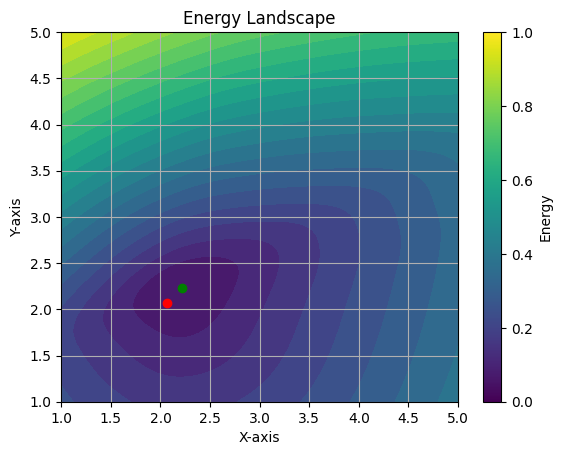

In [83]:
print(trajectory[8])
plot_energy(trajectory[8])

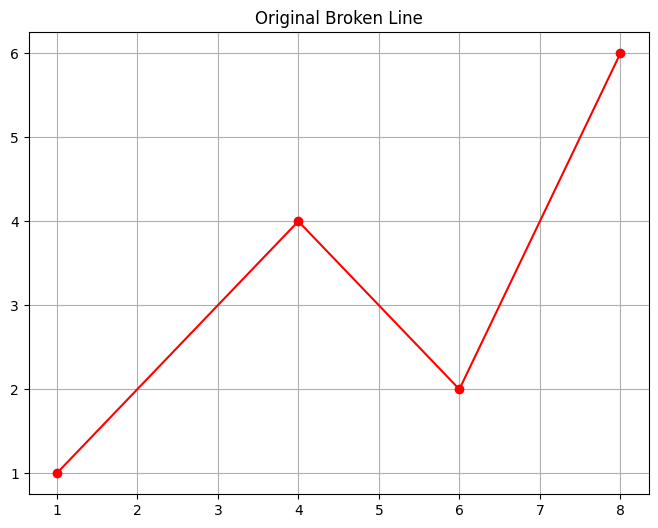

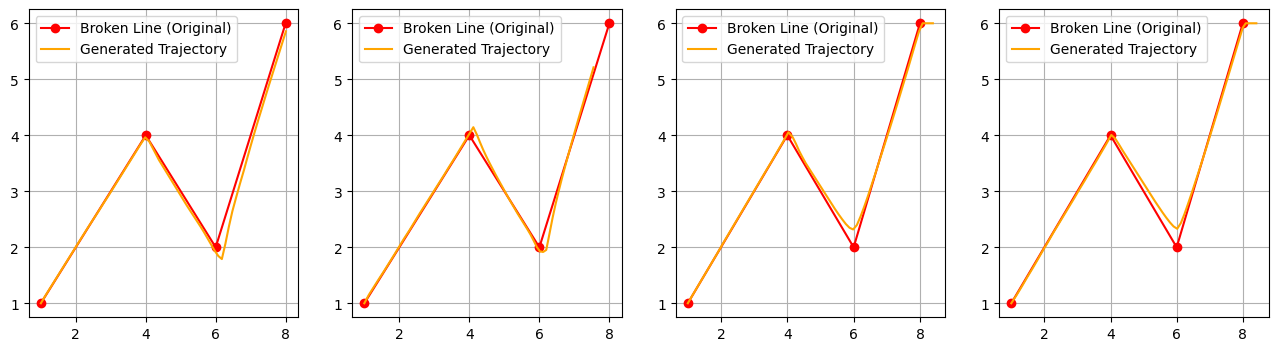

In [107]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from methods import langvin_sample, energy_discrepancy
import os

# Set CUDA launch blocking to avoid race conditions
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the function to train the EBM model
def train_ebm(X, Y, t_noise=0.25, num_epochs=2000, batch_size=32, hidden_size=512):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = EBM(X.shape[-1]+Y.shape[-1], hidden_size, 1).to(device)
    optimizer = optim.Adam(model.parameters())
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            loss, _, _  = energy_discrepancy(model, target, input, t_noise=t_noise, m_particles=256, w_stable=0.5)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
    return model

# Function to generate the trajectory step by step
def generate_trajectory_ebm(model, A, n_steps):
    trajectory = [A]  # Start with point A
    current_point = torch.tensor(A, dtype=torch.float32).to(device)
    
    model.eval()
    x, y = torch.linspace(0., 10., 1000), torch.linspace(0., 6., 1000)
    X_mesh, Y_mesh = torch.meshgrid(x, y)
    X_mesh = X_mesh[...,None]
    Y_mesh = Y_mesh[...,None]
    p = torch.cat((X_mesh.to(device), Y_mesh.to(device)), dim=-1)
    for _ in range(n_steps):
        temp = current_point[None, None, ...].repeat([1000, 1000, 1])
        Z_mesh = ebm(p, temp.to(device)).cpu().detach().numpy()
        i, j, _ = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)
        trajectory.append(np.array([x[i], y[j]]))
        # Predict the next two points using the current point
        '''next_points = langvin_sample(model, current_point, current_point).cpu().detach().numpy()
        
        # Add only the first predicted point to the trajectory
        first_predicted_point = next_points[0]  # Get the first point in the prediction
        trajectory.append(first_predicted_point)
        '''
        # Update the current point for the next prediction
        current_point = torch.tensor(([x[i], y[j]]), dtype=torch.float32).to(device)
    
    return np.array(trajectory)

# Function to create a broken line (piecewise linear path)
def create_broken_line(points, n_per_segment):
    X, Y = [], []
    for i in range(len(points) - 1):
        A = points[i]
        B = points[i + 1]
        t = np.random.uniform(0, 1, n_per_segment)
        segment_X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
        c = (B - A) / n_per_segment
        segment_Y = segment_X + c
        X.append(segment_X)
        Y.append(segment_Y)
    return np.vstack(X), np.vstack(Y)

# Example usage
# Define the points that create the broken line
points = [np.array([1.0, 1.0]), np.array([4.0, 4.0]), np.array([6.0, 2.0]), np.array([8.0, 6.0])]
n_per_segment = 20  # Number of steps per segment

# Create the broken line data
X, Y = create_broken_line(points, n_per_segment)

# Plot the original broken line
plt.figure(figsize=(8, 6))
plt.plot(*zip(*points), 'ro-', label='Broken Line (Original)')
plt.grid(True)
plt.title('Original Broken Line')
plt.show()

# Now generate the trajectory using the EBM model for each segment
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    ebm = train_ebm(X, Y)    
    trajectory = generate_trajectory_ebm(ebm, points[0], len(X))
    ax[i].plot(*zip(*points), 'ro-', label='Broken Line (Original)')
    # Plot the trajectory
    ax[i].plot(trajectory[:, 0], trajectory[:, 1], c='orange', label='Generated Trajectory')
    ax[i].legend()
    ax[i].grid(True)
    
plt.show()

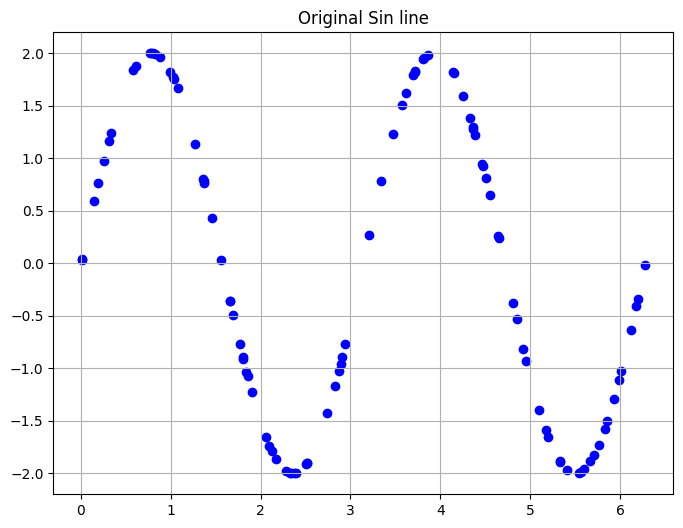

Epoch [0/2000], Loss: 5.5605
Epoch [100/2000], Loss: 2.4312
Epoch [200/2000], Loss: 1.0338
Epoch [300/2000], Loss: 0.6780
Epoch [400/2000], Loss: 0.6037
Epoch [500/2000], Loss: -0.6776
Epoch [600/2000], Loss: 1.1789
Epoch [700/2000], Loss: 1.8030
Epoch [800/2000], Loss: -0.2633
Epoch [900/2000], Loss: 0.1979
Epoch [1000/2000], Loss: 2.1171
Epoch [1100/2000], Loss: -0.5906
Epoch [1200/2000], Loss: -0.2334
Epoch [1300/2000], Loss: -0.5549
Epoch [1400/2000], Loss: -0.2586
Epoch [1500/2000], Loss: -0.4148
Epoch [1600/2000], Loss: 0.0211
Epoch [1700/2000], Loss: -0.2473
Epoch [1800/2000], Loss: -0.5199
Epoch [1900/2000], Loss: 0.4262
Epoch [0/2000], Loss: 5.5417
Epoch [100/2000], Loss: 1.7416
Epoch [200/2000], Loss: 0.6281
Epoch [300/2000], Loss: 0.6554
Epoch [400/2000], Loss: 0.2335
Epoch [500/2000], Loss: 0.1518
Epoch [600/2000], Loss: 0.6982
Epoch [700/2000], Loss: 0.0413
Epoch [800/2000], Loss: -0.2556
Epoch [900/2000], Loss: 1.5676
Epoch [1000/2000], Loss: -0.6555
Epoch [1100/2000], Lo

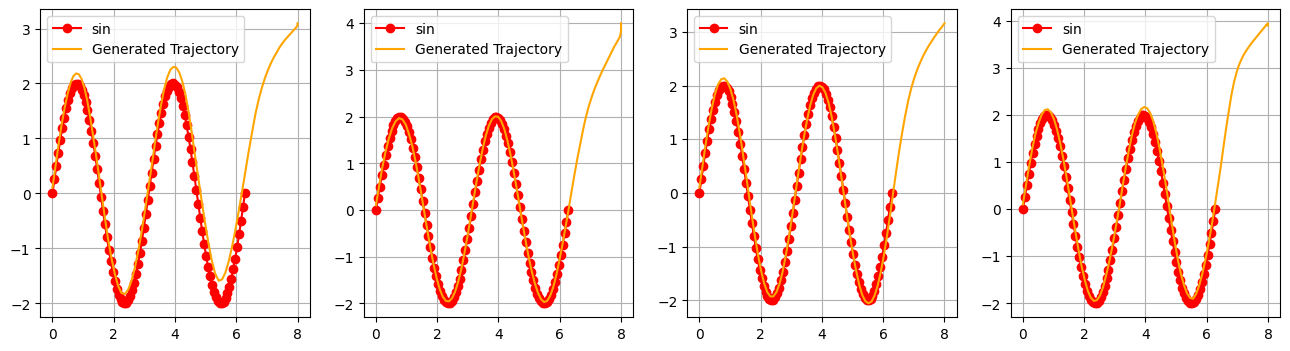

In [119]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from methods import langvin_sample, energy_discrepancy
import os

# Set CUDA launch blocking to avoid race conditions
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the function to train the EBM model
def train_ebm(X, Y, t_noise=0.3, num_epochs=2000, batch_size=32, hidden_size=512):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = EBM(X.shape[-1]+Y.shape[-1], hidden_size, 1).to(device)
    optimizer = optim.Adam(model.parameters())
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            loss, _, _  = energy_discrepancy(model, target, input, t_noise=t_noise, m_particles=256, w_stable=0.5)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')
    
    return model

# Function to generate the trajectory step by step
def generate_trajectory_ebm(model, A, n_steps):
    trajectory = [A]  # Start with point A
    current_point = torch.tensor(A, dtype=torch.float32).to(device)
    
    model.eval()
    x, y = torch.linspace(-2., 8., 1000), torch.linspace(-4., 4., 1000)
    X_mesh, Y_mesh = torch.meshgrid(x, y)
    X_mesh = X_mesh[...,None]
    Y_mesh = Y_mesh[...,None]
    p = torch.cat((X_mesh.to(device), Y_mesh.to(device)), dim=-1)
    for _ in range(n_steps):
        temp = current_point[None, None, ...].repeat([1000, 1000, 1])
        Z_mesh = ebm(p, temp.to(device)).cpu().detach().numpy()
        i, j, _ = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)
        trajectory.append(np.array([x[i], y[j]]))
        # Predict the next two points using the current point
        '''next_points = langvin_sample(model, current_point, current_point).cpu().detach().numpy()
        
        # Add only the first predicted point to the trajectory
        first_predicted_point = next_points[0]  # Get the first point in the prediction
        trajectory.append(first_predicted_point)
        '''
        # Update the current point for the next prediction
        current_point = torch.tensor(([x[i], y[j]]), dtype=torch.float32).to(device)
    
    return np.array(trajectory)

# Function to create a broken line (piecewise linear path)
def create_broken_line(points, n_per_segment):
    X, Y = [], []
    for i in range(len(points) - 1):
        A = points[i]
        B = points[i + 1]
        t = np.random.uniform(0, 1, n_per_segment)
        segment_X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
        c = (B - A) / n_per_segment
        segment_Y = segment_X + c
        X.append(segment_X)
        Y.append(segment_Y)
    return np.vstack(X), np.vstack(Y)

def simulate_trajectory(num_samples, amplitude=1.0, freq=1.0, random_sampling=False):
    X, Y = [], []

    if random_sampling:
        for _ in range(num_samples):
            x = np.random.uniform(0, 2 * np.pi)
            y = amplitude * np.sin(freq * x)
            dt = 0.1 #np.random.uniform(0.09, 0.11)
            x_next = x + dt
            y_next = amplitude * np.sin(freq * x_next)
            X.append(np.array([x, y]))
            Y.append(np.array([x_next, y_next]))
        X = np.array(X)
        Y = np.array(Y)
    else:
        t = np.linspace(0, 2 * np.pi, num_samples + 1)[:-1]
        x = t
        y = amplitude * np.sin(freq * t)
        x_next = t + 0.1
        y_next = amplitude * np.sin(freq * x_next)
        X = np.stack((x, y), axis=-1)
        Y = np.stack((x_next, y_next), axis=-1)

    return X, Y

# Example usage
# Define the points that create the broken line
points = [np.array([1.0, 1.0]), np.array([4.0, 4.0]), np.array([6.0, 2.0]), np.array([8.0, 6.0])]
n_per_segment = 20  # Number of steps per segment

# Create the broken line data
#X, Y = create_broken_line(points, n_per_segment)
X, Y = simulate_trajectory(100, amplitude=2.0, freq=2, random_sampling=True)

# Plot the original broken line
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Start Points')
plt.grid(True)
plt.title('Original Sin line')
plt.show()

# Now generate the trajectory using the EBM model for each segment
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    ebm = train_ebm(X, Y)    
    trajectory = generate_trajectory_ebm(ebm, np.array([0.0, 0.1]), len(X))
    ax[i].plot(np.linspace(0, 2*np.pi, 100), 2*np.sin(2*np.linspace(0, 2*np.pi, 100)), 'ro-', label='sin')
    # Plot the trajectory
    ax[i].plot(trajectory[:, 0], trajectory[:, 1], c='orange', label='Generated Trajectory')
    ax[i].legend()
    ax[i].grid(True)
    
plt.show()

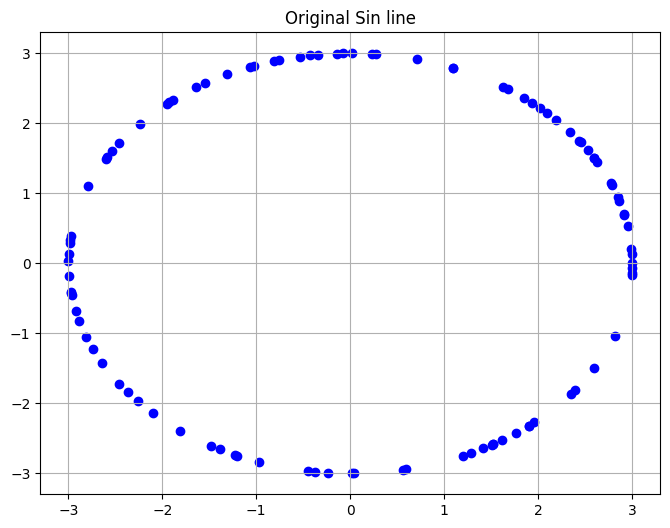

Epoch [0/2000], Loss: 5.4806
Epoch [100/2000], Loss: 0.0860
Epoch [200/2000], Loss: 0.5394
Epoch [300/2000], Loss: -0.5214
Epoch [400/2000], Loss: -0.5114
Epoch [500/2000], Loss: 0.4466
Epoch [600/2000], Loss: -0.5131
Epoch [700/2000], Loss: -0.2312
Epoch [800/2000], Loss: 1.1816
Epoch [900/2000], Loss: -0.3971
Epoch [1000/2000], Loss: -0.0405
Epoch [1100/2000], Loss: -0.6255
Epoch [1200/2000], Loss: -0.1704
Epoch [1300/2000], Loss: -0.2788
Epoch [1400/2000], Loss: -0.6931
Epoch [1500/2000], Loss: -0.6850
Epoch [1600/2000], Loss: -0.1593
Epoch [1700/2000], Loss: -0.2936
Epoch [1800/2000], Loss: 1.7098
Epoch [1900/2000], Loss: -0.5136
Epoch [0/2000], Loss: 5.5837
Epoch [100/2000], Loss: 0.9124
Epoch [200/2000], Loss: 0.4383
Epoch [300/2000], Loss: 0.3755
Epoch [400/2000], Loss: 0.0098
Epoch [500/2000], Loss: -0.2334
Epoch [600/2000], Loss: -0.0765
Epoch [700/2000], Loss: -0.0694
Epoch [800/2000], Loss: -0.5644
Epoch [900/2000], Loss: -0.2431
Epoch [1000/2000], Loss: -0.6855
Epoch [1100/

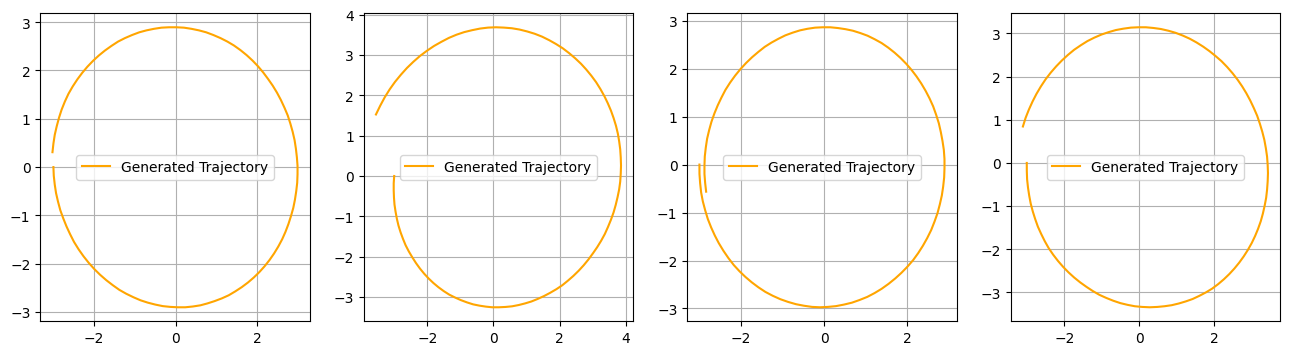

In [124]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from methods import langvin_sample, energy_discrepancy
import os

# Set CUDA launch blocking to avoid race conditions
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the function to train the EBM model
def train_ebm(X, Y, t_noise=0.3, num_epochs=2000, batch_size=32, hidden_size=512):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = EBM(X.shape[-1]+Y.shape[-1], hidden_size, 1).to(device)
    optimizer = optim.Adam(model.parameters())
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            loss, _, _  = energy_discrepancy(model, target, input, t_noise=t_noise, m_particles=256, w_stable=0.5)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')
    
    return model

# Function to generate the trajectory step by step
def generate_trajectory_ebm(model, A, n_steps):
    trajectory = [A]  # Start with point A
    current_point = torch.tensor(A, dtype=torch.float32).to(device)
    
    model.eval()
    x, y = torch.linspace(-4., 4., 1000), torch.linspace(-4., 4., 1000)
    X_mesh, Y_mesh = torch.meshgrid(x, y)
    X_mesh = X_mesh[...,None]
    Y_mesh = Y_mesh[...,None]
    p = torch.cat((X_mesh.to(device), Y_mesh.to(device)), dim=-1)
    for _ in range(n_steps):
        temp = current_point[None, None, ...].repeat([1000, 1000, 1])
        Z_mesh = ebm(p, temp.to(device)).cpu().detach().numpy()
        i, j, _ = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)
        trajectory.append(np.array([x[i], y[j]]))
        # Predict the next two points using the current point
        '''next_points = langvin_sample(model, current_point, current_point).cpu().detach().numpy()
        
        # Add only the first predicted point to the trajectory
        first_predicted_point = next_points[0]  # Get the first point in the prediction
        trajectory.append(first_predicted_point)
        '''
        # Update the current point for the next prediction
        current_point = torch.tensor(([x[i], y[j]]), dtype=torch.float32).to(device)
    
    return np.array(trajectory)

# Function to create a broken line (piecewise linear path)
def create_broken_line(points, n_per_segment):
    X, Y = [], []
    for i in range(len(points) - 1):
        A = points[i]
        B = points[i + 1]
        t = np.random.uniform(0, 1, n_per_segment)
        segment_X = (1 - t)[:, np.newaxis] * A + t[:, np.newaxis] * B
        c = (B - A) / n_per_segment
        segment_Y = segment_X + c
        X.append(segment_X)
        Y.append(segment_Y)
    return np.vstack(X), np.vstack(Y)

def simulate_trajectory(num_samples, amplitude=1.0, freq=1.0, random_sampling=False):
    X, Y = [], []

    if random_sampling:
        for _ in range(num_samples):
            x = np.random.uniform(0, 2 * np.pi)
            y = amplitude * np.sin(freq * x)
            dt = 0.1 #np.random.uniform(0.09, 0.11)
            x_next = x + dt
            y_next = amplitude * np.sin(freq * x_next)
            X.append(np.array([x, y]))
            Y.append(np.array([x_next, y_next]))
        X = np.array(X)
        Y = np.array(Y)
    else:
        t = np.linspace(0, 2 * np.pi, num_samples + 1)[:-1]
        x = t
        y = amplitude * np.sin(freq * t)
        x_next = t + 0.1
        y_next = amplitude * np.sin(freq * x_next)
        X = np.stack((x, y), axis=-1)
        Y = np.stack((x_next, y_next), axis=-1)

    return X, Y

def simulate_circle(num_samples, radius=1.0, random_sampling=False):
    X, Y = [], []
    if random_sampling:
        for _ in range(num_samples):
            theta = np.random.uniform(0, 2 * np.pi)
            x = radius * np.cos(theta)
            y = radius * np.sin(theta)
            dtheta = 2*np.pi/num_samples #np.random.uniform(0.09, 0.11)
            x_next = radius * np.cos(theta+dtheta)
            y_next = radius * np.sin(theta+dtheta)
            X.append(np.array([x, y]))
            Y.append(np.array([x_next, y_next]))
        X = np.array(X)
        Y = np.array(Y)
    else:
        theta = np.linspace(0, 2 * np.pi, num_samples + 1)[:-1]
        x = radius * np.cos(theta)
        y = radius * np.sin(theta)
        dtheta = 2*np.pi/num_samples #np.random.uniform(0.09, 0.11)
        x_next = radius * np.cos(theta+dtheta)
        y_next = radius * np.sin(theta+dtheta)
        X = np.stack((x, y), axis=-1)
        Y = np.stack((x_next, y_next), axis=-1)
    return X, Y

# Example usage
# Define the points that create the broken line
points = [np.array([1.0, 1.0]), np.array([4.0, 4.0]), np.array([6.0, 2.0]), np.array([8.0, 6.0])]
n_per_segment = 20  # Number of steps per segment

# Create the broken line data
#X, Y = create_broken_line(points, n_per_segment)
X, Y = simulate_circle(100, radius=3, random_sampling=True)

# Plot the original broken line
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Start Points')
#plt.scatter(Y[:6, 0], Y[:6, 1], c='red', label='Next Points')
plt.grid(True)
plt.title('Original Sin line')
plt.show()

# Now generate the trajectory using the EBM model for each segment
fig, ax = plt.subplots(1, 4, figsize=(16, 4))

for i in range(4):
    ebm = train_ebm(X, Y)    
    trajectory = generate_trajectory_ebm(ebm, np.array([-3., 0.0]), len(X))
    #ax[i].plot(np.linspace(0, 2*np.pi, 100), 2*np.sin(2*np.linspace(0, 2*np.pi, 100)), 'ro-', label='sin')
    # Plot the trajectory
    ax[i].plot(trajectory[:, 0], trajectory[:, 1], c='orange', label='Generated Trajectory')
    ax[i].legend()
    ax[i].grid(True)
    
plt.show()

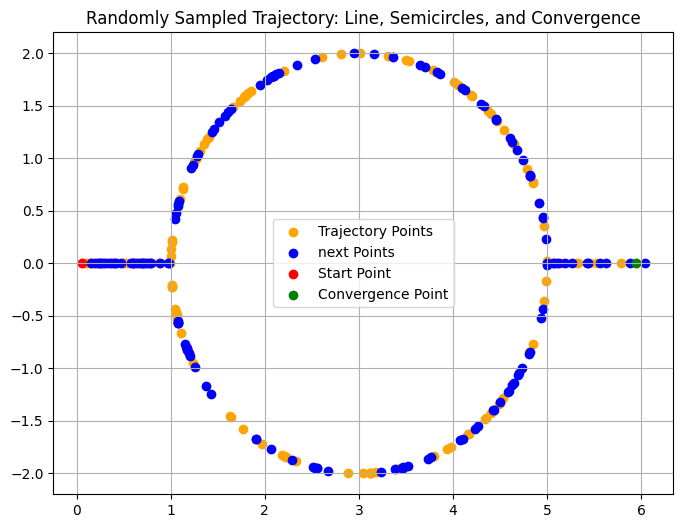

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def create_combined_trajectory(num_points_line=30, num_points_semicircle=50, num_points_convergence=10):
    # Parameters for the trajectory
    line_start = np.array([0.0, 0.0])
    line_end = np.array([1.0, 0.0])
    semicircle_radius = 2.0
    convergence_point = np.array([4.0, 0.0])
    
    # 1. Create the straight line segment with random sampling
    t_line = np.sort(np.random.rand(num_points_line))
    line_segment = np.outer(1 - t_line, line_start) + np.outer(t_line, line_end)
    
    # Adjust y values based on condition
    line_segment_y = line_segment.copy()
    line_segment_y[:, 0] += 0.1
    condition = line_segment_y[:, 0] > 1
    y_values = np.sqrt(4 - (3 - line_segment_y[condition, 0])**2)
    random_sign = np.random.rand(sum(condition)) > 0.5
    line_segment_y[condition, 1] = np.where(random_sign, y_values, -y_values)
    
    # 2. Create the top semicircle with random sampling and rotation
    t_semicircle_top = np.sort(np.random.rand(num_points_semicircle)) * np.pi
    semicircle_top = np.array([line_end[0] + semicircle_radius * (1 - np.cos(t_semicircle_top)), 
                               semicircle_radius * np.sin(t_semicircle_top)]).T
    
    # Define the rotation angle (clockwise 10 degrees)
    theta = np.radians(-10)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    
    # Rotate the points
    relative_points = semicircle_top - np.array([3.0, 0.0])
    rotated_points = np.dot(relative_points, rotation_matrix.T) + np.array([3.0, 0.0])
    
    # Adjust y values for y < 0
    condition = rotated_points[:, 1] < 0
    rotated_points[condition, 1] = 0
    rotated_points[condition, 0] = 5.05 - (rotated_points[condition, 0] - 5.0)
    top_y = rotated_points
    
    # 3. Create the bottom semicircle with random sampling and rotation
    t_semicircle_bottom = np.sort(np.random.rand(num_points_semicircle)) * np.pi
    semicircle_bottom = np.array([line_end[0] + semicircle_radius * (1 - np.cos(t_semicircle_bottom)), 
                                  -semicircle_radius * np.sin(t_semicircle_bottom)]).T
    
    # Define the rotation angle (counterclockwise 10 degrees)
    theta = np.radians(10)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta)],
        [np.sin(theta), np.cos(theta)]
    ])
    
    # Rotate the points
    relative_points = semicircle_bottom - np.array([3.0, 0.0])
    rotated_points = np.dot(relative_points, rotation_matrix.T) + np.array([3.0, 0.0])
    
    # Adjust y values for y > 0
    condition = rotated_points[:, 1] > 0
    rotated_points[condition, 1] = 0
    rotated_points[condition, 0] = 5.05 - (rotated_points[condition, 0] - 5.0)
    bottom_y = rotated_points
    
    # 4. Create the convergence part with random sampling
    t_convergence = np.sort(np.random.rand(num_points_convergence))
    top_convergence = np.outer(1 - t_convergence, np.array([5.0, 0.0])) + np.outer(t_convergence, np.array([6.0, 0.0]))
    convergence_y = top_convergence.copy()
    convergence_y[:, 0] += 0.1
    
    # Combine all segments into one trajectory
    combined_trajectory = np.vstack([line_segment, semicircle_top, semicircle_bottom, top_convergence])
    y = np.vstack([line_segment_y, top_y, bottom_y, convergence_y])

    return combined_trajectory, y

# Generate the combined trajectory
X, Y = create_combined_trajectory()

# Plot the generated trajectory
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='orange', label='Trajectory Points')
plt.scatter(Y[:, 0], Y[:, 1], c='blue', label='next Points')
plt.scatter(X[0, 0], X[0, 1], c='red', label='Start Point')
plt.scatter(X[-1, 0], X[-1, 1], c='green', label='Convergence Point')

plt.legend()
plt.grid(True)
plt.title('Randomly Sampled Trajectory: Line, Semicircles, and Convergence')
plt.show()


In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from methods import langvin_sample, energy_discrepancy
import os

# Set CUDA launch blocking to avoid race conditions
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the function to train the EBM model
def train_ebm(X, Y, t_noise=0.3, num_epochs=2000, batch_size=32, hidden_size=512):
    X_tensor = torch.tensor(X, dtype=torch.float32)
    Y_tensor = torch.tensor(Y, dtype=torch.float32)
    dataset = TensorDataset(X_tensor, Y_tensor)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    model = EBM(X.shape[-1]+Y.shape[-1], hidden_size, 1).to(device)
    optimizer = optim.Adam(model.parameters())
    
    for epoch in range(num_epochs):
        for input, target in dataloader:
            input = input.to(device)
            target = target.to(device)
            loss, _, _  = energy_discrepancy(model, target, input, t_noise=t_noise, m_particles=256, w_stable=0.5)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        if epoch % 100 == 0:
            print(f'Epoch [{epoch}/{num_epochs}], Loss: {loss.item():.4f}')
    
    return model

# Function to generate the trajectory step by step
def generate_trajectory_ebm(model, A, n_steps):
    trajectory = [A]  # Start with point A
    current_point = torch.tensor(A, dtype=torch.float32).to(device)
    
    model.eval()
    x, y = torch.linspace(-4., 4., 1000), torch.linspace(-4., 4., 1000)
    X_mesh, Y_mesh = torch.meshgrid(x, y)
    X_mesh = X_mesh[...,None]
    Y_mesh = Y_mesh[...,None]
    p = torch.cat((X_mesh.to(device), Y_mesh.to(device)), dim=-1)
    for _ in range(n_steps):
        temp = current_point[None, None, ...].repeat([1000, 1000, 1])
        Z_mesh = ebm(p, temp.to(device)).cpu().detach().numpy()
        i, j, _ = np.unravel_index(np.argmin(Z_mesh), Z_mesh.shape)
        trajectory.append(np.array([x[i], y[j]]))
        # Predict the next two points using the current point
        '''next_points = langvin_sample(model, current_point, current_point).cpu().detach().numpy()
        
        # Add only the first predicted point to the trajectory
        first_predicted_point = next_points[0]  # Get the first point in the prediction
        trajectory.append(first_predicted_point)
        '''
        # Update the current point for the next prediction
        current_point = torch.tensor(([x[i], y[j]]), dtype=torch.float32).to(device)
    
    return np.array(trajectory)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))

for i in range(1):
    ebm = train_ebm(X, Y)    
    trajectory = generate_trajectory_ebm(ebm, np.array([0.0, 0.0]), 40)
    #ax[i].plot(np.linspace(0, 2*np.pi, 100), 2*np.sin(2*np.linspace(0, 2*np.pi, 100)), 'ro-', label='sin')
    # Plot the trajectory
    ax[i].plot(trajectory[:, 0], trajectory[:, 1], c='orange', label='Generated Trajectory')
    ax[i].legend()
    ax[i].grid(True)
    
plt.show()

Epoch [0/2000], Loss: 5.5432
Epoch [100/2000], Loss: 1.0030
Epoch [200/2000], Loss: 0.1436
Epoch [300/2000], Loss: 0.4192
Epoch [400/2000], Loss: 0.2214
Epoch [500/2000], Loss: -0.1924
Epoch [600/2000], Loss: -0.2348
Epoch [700/2000], Loss: 0.3972
Epoch [800/2000], Loss: -0.5059
Epoch [900/2000], Loss: -0.3433
Epoch [1000/2000], Loss: -0.6755
Epoch [1100/2000], Loss: -0.2559
Epoch [1200/2000], Loss: -0.5116
Epoch [1300/2000], Loss: -0.1884
Epoch [1400/2000], Loss: -0.5144
Epoch [1500/2000], Loss: -0.6154
Epoch [1600/2000], Loss: -0.4191
Epoch [1700/2000], Loss: -0.5198
Epoch [1800/2000], Loss: -0.5157
Epoch [1900/2000], Loss: -0.3657


/root/miniconda3/envs/ebm/lib/python3.8/site-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Epoch [0/2000], Loss: 5.5358
Epoch [100/2000], Loss: 1.4640
